# Airbnb and Zillow

#### This exploration will be conducted in three parts:
**Part 1**: *What are the Airbnb listing trends in the U.S. Market?*

**Part 2**: *The Zillow Home Value Index (ZHVI) And Airbnb Metrics, Listing Price*

**Part 3**: *Given ZHVI and listing trends, develop model that can predict price given these two sets of features.*

Airbnb Data Source: http://insideairbnb.com/

Zillow Data Source: http://www.zillow.com/research/data/

### Exporting the Modules

The following code exports the necessary modules used for data analysis and visualizations. 

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
import warnings
warnings.filterwarnings('ignore')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

### Variable Functions

The `read_data` function allows the user to extract relevant data from the Inside Airbnb website. I have collected the following attributes which I believe is relevant:

 - **ID:** This is a unique identifier for each listing.
 - **Room Type:** Defines the layout type of the listing as either: ‘Single Room’, ‘Shared Room’ or ‘Entire Home/Apartments’.
 - **Accomodates:** The number of people that each listing can accomodate.
 - **Bathrooms:** The number of bathrooms in each listing.
 - **Bedrooms:** The number of bedrooms in each listing.
 - **Availability 365:** The number of days that a listing is available to be booked in the next 365 days.
 - **Number of Reviews:** The number of reviews for each listing.
 - **Review Score, Accuracy:** This is the average accuracy rating for each listing. The user rates the listing based on how accurate the listing was as compared to the posting online.
 - **Review Score, Value:** This is the average value rating for each listing. The user rates the listing based on its value.
 - **Neighbourhood:** Allows use to extract the borough from the data.
 - **Neighbourhood Cleansed:** Allows us to extract the region/area within each borough.

The `get_stats` conducts descriptive analysis on the parameters, while `reoder` sets the index to the location/area. 

In [2]:
def read_data(location):
    location = location[['id', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
      'availability_365', 'number_of_reviews', 'review_scores_rating', 'neighbourhood', 'neighbourhood_cleansed',
       'review_scores_accuracy', 'review_scores_value']]
    return location

def get_stats(location):
    x = ['accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']
    location = location.loc[:, x]
    location_stats = location.describe()
    location_stats = pd.concat([location_stats.ix[0:4], location_stats.ix[7:]])
    return location_stats


def reorder(location):
    new = location.set_index('location', append = True).unstack(0)
    return new

### Getting Data From Airbnb

Creating a dataframe to house statistical summaries of the listing data so that we can analyze listing trends.

In [188]:

nyc = pd.read_csv('listings.csv.gz')
nyc = read_data(nyc)
nyc['price'] = nyc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

# %% Getting Statistics on Airbnb Data

bath_beach_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Bath Beach'])
bath_beach_s['location'] = 'Bath Beach'
bath_beach_s = reorder(bath_beach_s)

bay_ridge_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Bay Ridge'])
bay_ridge_s['location'] = 'Bay Ridge'
bay_ridge_s = reorder(bay_ridge_s)

bedstuy_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Bedford-Stuyvesant'])
bedstuy_s['location'] = 'Bedford-Stuyvesant'
bedstuy_s = reorder(bedstuy_s)

bensonhurst_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Bensonhurst'])
bensonhurst_s['location'] = 'Bensonhurst'
bensonhurst_s = reorder(bensonhurst_s)

bergen_beach_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Bergen Beach'])
bergen_beach_s['location'] = 'Bergen Beach'
bergen_beach_s = reorder(bergen_beach_s)

boerum_hill_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Boerum Hill'])
boerum_hill_s['location'] = 'Boerum Hill'
boerum_hill_s = reorder(boerum_hill_s)

borough_park_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Borough Park'])
borough_park_s['location'] = 'Borough Park'
borough_park_s = reorder(borough_park_s)

brighton_beach_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Brighton Beach'])
brighton_beach_s['location'] = 'Brighton Beach'
brighton_beach_s = reorder(brighton_beach_s)

brooklyn_height_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Brooklyn Heights'])
brooklyn_height_s['location'] = 'Brooklyn Heights'
brooklyn_height_s = reorder(brooklyn_height_s)

brownsville_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Brownsville'])
brownsville_s['location'] = 'Brownsville'
brownsville_s = reorder(brownsville_s)

bushwick_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Bushwick'])
bushwick_s['location'] = 'Bushwick'
bushwick_s = reorder(bushwick_s)

canarsie_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Canarsie'])
canarsie_s['location'] = 'Canarsie'
canarsie_s = reorder(canarsie_s)

carroll_gardens_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Carroll Gardens'])
carroll_gardens_s['location'] = 'Carroll Gardens'
carroll_gardens_s = reorder(carroll_gardens_s)

clinton_hill_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Clinton Hill'])
clinton_hill_s['location'] = 'Clinton Hill'
clinton_hill_s = reorder(clinton_hill_s)

cobble_hill_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Cobble Hill'])
cobble_hill_s['location'] = 'Cobble Hill'
cobble_hill_s = reorder(cobble_hill_s)

columbia_st_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Columbia St'])
columbia_st_s['location'] = 'Columbia St'
columbia_st_s = reorder(columbia_st_s)

coney_island_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Coney Island'])
coney_island_s['location'] = 'Coney Island'
coney_island_s = reorder(coney_island_s)

crown_heights_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Crown Heights'])
crown_heights_s['location'] = 'Crown Heights'
crown_heights_s = reorder(crown_heights_s)

cypress_hills_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Cypress Hills'])
cypress_hills_s['location'] = 'Cypress Hills'
cypress_hills_s = reorder(cypress_hills_s)

downtown_brooklyn_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Downtown Brooklyn'])
downtown_brooklyn_s['location'] = 'Downtown Brooklyn'
downtown_brooklyn_s = reorder(downtown_brooklyn_s)

dumbo_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'DUMBO'])
dumbo_s['location'] = 'DUMBO'
dumbo_s = reorder(dumbo_s)

dyker_heights_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Dyker Heights'])
dyker_heights_s['location'] = 'Dyker Heights'
dyker_heights_s = reorder(dyker_heights_s)

east_flatbash_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'East Flatbush'])
east_flatbash_s['location'] = 'East Flatbush'
east_flatbash_s = reorder(east_flatbash_s)

east_ny_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'East New York'])
east_ny_s['location'] = 'East New York'
east_ny_s = reorder(east_ny_s)

flatbush_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Flatbush'])
flatbush_s['location'] = 'Flatbush'
flatbush_s = reorder(flatbush_s)

flatlands_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Flatlands'])
flatlands_s['location'] = 'Flatlands'
flatlands_s = reorder(flatlands_s)

fort_greene_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Fort Greene'])
fort_greene_s['location'] = 'Fort Greene'
fort_greene_s = reorder(fort_greene_s)

fort_hamilton_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Fort Hamilton'])
fort_hamilton_s['location'] = 'Fort Hamilton'
fort_hamilton_s = reorder(fort_hamilton_s)

gowanus_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Gowanus'])
gowanus_s['location'] = 'Gowanus'
gowanus_s = reorder(gowanus_s)

gravesend_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Gravesend'])
gravesend_s['location'] = 'Gravesend'
gravesend_s = reorder(gravesend_s)

greenpoint_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Greenpoint'])
greenpoint_s['location'] = 'Greenpoint'
greenpoint_s = reorder(greenpoint_s)

kensington_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Kensington'])
kensington_s['location'] = 'Kensington'
kensington_s = reorder(kensington_s)

manhattan_beach_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Manhattan Beach'])
manhattan_beach_s['location'] = 'Manhattan Beach'
manhattan_beach_s = reorder(manhattan_beach_s)

midwood_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Midwood'])
midwood_s['location'] = 'Midwood'
midwood_s = reorder(midwood_s)

mill_basin_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Mill Basin'])
mill_basin_s['location'] = 'Mill Basin'
mill_basin_s = reorder(mill_basin_s)

navy_yard_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Navy Yard'])
navy_yard_s['location'] = 'Navy Yard'
navy_yard_s = reorder(navy_yard_s)

park_slope_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Park Slope'])
park_slope_s['location'] = 'Park Slope'
park_slope_s = reorder(park_slope_s)

prospect_heights_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Prospect Heights'])
prospect_heights_s['location'] = 'Prospect Heights'
prospect_heights_s = reorder(prospect_heights_s)

pros_leff_gard_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Prospect-Lefferts Gardens'])
pros_leff_gard_s['location'] = 'Prospect-Lefferts Gardens'
pros_leff_gard_s = reorder(pros_leff_gard_s)

red_hook_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Red Hook'])
red_hook_s['location'] = 'Red Hook'
red_hook_s = reorder(red_hook_s)

sea_gate_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Sea Gate'])
sea_gate_s['location'] = 'Sea Gate'
sea_gate_s = reorder(sea_gate_s)

sheepshead_bay_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Sheepshead Bay'])
sheepshead_bay_s['location'] = 'Sheepshead Bay'
sheepshead_bay_s = reorder(sheepshead_bay_s)

south_slope_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'South Slope'])
south_slope_s['location'] = 'South Slope'
south_slope_s = reorder(south_slope_s)

sunset_park_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Sunset Park'])
sunset_park_s['location'] = 'Sunset Park'
sunset_park_s = reorder(sunset_park_s)

vinegar_hill_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Vinegar Hill'])
vinegar_hill_s['location'] = 'Vinegar Hill'
vinegar_hill_s = reorder(vinegar_hill_s)

williamsburg_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Williamsburg'])
williamsburg_s['location'] = 'Williamsburg'
williamsburg_s = reorder(williamsburg_s)

windsor_terrace_s = get_stats(nyc[nyc['neighbourhood_cleansed'] == 'Windsor Terrace'])
windsor_terrace_s['location'] = 'Windsor Terrace'
windsor_terrace_s = reorder(windsor_terrace_s)

#Combining the statistics into one callable object

statistics = pd.concat([bath_beach_s, bay_ridge_s, bedstuy_s, bensonhurst_s, bergen_beach_s, boerum_hill_s, borough_park_s,
            brighton_beach_s, brooklyn_height_s, brownsville_s, bushwick_s, canarsie_s, carroll_gardens_s, clinton_hill_s, cobble_hill_s,
            columbia_st_s, coney_island_s, crown_heights_s, cypress_hills_s, downtown_brooklyn_s, dumbo_s, dyker_heights_s, east_flatbash_s, east_ny_s,
            flatbush_s, flatlands_s, fort_greene_s, fort_hamilton_s, gowanus_s, gravesend_s, greenpoint_s, kensington_s, manhattan_beach_s,
            midwood_s, mill_basin_s, navy_yard_s, park_slope_s, prospect_heights_s, pros_leff_gard_s, red_hook_s, sea_gate_s, sheepshead_bay_s,
            south_slope_s, sunset_park_s, vinegar_hill_s, williamsburg_s, windsor_terrace_s])

statistics.index
statistics

KeyError: 'neighbourhood_cleansed'

## Part 1: Exploratory Airbnb Data -- Listing Trends in Brooklyn
Looking at descriptive statistics in each city to explore listing trends.

#### Count of Listings Per Area: Which areas in Brooklyn have the most listings?

Williamsburg and Bedford-Stuyvasant are outliers with a relatively far larger amount of listings than the others. This high supply of listings may suggest that they are the more popular travel destinations. Bushwick comes in third and Crown Heights fourth.

As expected, smaller and less frequented areas: Sea Gate, Navy Yard and Mill Basin have the least amount of listings.

In [7]:
x = {'Bath Beach': len(nyc[nyc['neighbourhood_cleansed'] == 'Bath Beach']), 'Bay Ridge': len(nyc[nyc['neighbourhood_cleansed'] == 'Bay Ridge']), 'Bedford-Stuyvesant':len(nyc[nyc['neighbourhood_cleansed'] == 'Bedford-Stuyvesant']),
      'Bensonhurst':len(nyc[nyc['neighbourhood_cleansed'] == 'Bensonhurst']),'Bergen Beach':len(nyc[nyc['neighbourhood_cleansed'] == 'Bergen Beach']),'Boerum Hill':len(nyc[nyc['neighbourhood_cleansed'] == 'Boerum Hill']),
      'Borough Park':len(nyc[nyc['neighbourhood_cleansed'] == 'Borough Park']),'Brighton Beach':len(nyc[nyc['neighbourhood_cleansed'] == 'Brighton Beach']),'Brooklyn Heights':len(nyc[nyc['neighbourhood_cleansed'] == 'Brooklyn Heights']),
      'Brownsville':len(nyc[nyc['neighbourhood_cleansed'] == 'Brownsville']),'Bushwick':len(nyc[nyc['neighbourhood_cleansed'] == 'Bushwick']),'Canarsie':len(nyc[nyc['neighbourhood_cleansed'] == 'Canarsie']),
      'Carroll Gardens':len(nyc[nyc['neighbourhood_cleansed'] == 'Carroll Gardens']),'Clinton Hill':len(nyc[nyc['neighbourhood_cleansed'] == 'Clinton Hill']),'Cobble Hill':len(nyc[nyc['neighbourhood_cleansed'] == 'Cobble Hill']),
      'Columbia St':len(nyc[nyc['neighbourhood_cleansed'] == 'Columbia St']),'Coney Island':len(nyc[nyc['neighbourhood_cleansed'] == 'Coney Island']),'Crown Heights':len(nyc[nyc['neighbourhood_cleansed'] == 'Crown Heights']),
      'Cypress Hills':len(nyc[nyc['neighbourhood_cleansed'] == 'Cypress Hills']),'Downtown Brooklyn':len(nyc[nyc['neighbourhood_cleansed'] == 'Downtown Brooklyn']),'DUMBO':len(nyc[nyc['neighbourhood_cleansed'] == 'DUMBO']),
      'Dyker Heights':len(nyc[nyc['neighbourhood_cleansed'] == 'Dyker Heights']),'East Flatbush':len(nyc[nyc['neighbourhood_cleansed'] == 'East Flatbush']),'East New York':len(nyc[nyc['neighbourhood_cleansed'] == 'East New York']),
      'Flatbush':len(nyc[nyc['neighbourhood_cleansed'] == 'Flatbush']),'Flatlands':len(nyc[nyc['neighbourhood_cleansed'] == 'Flatlands']),'Fort Greene':len(nyc[nyc['neighbourhood_cleansed'] == 'Fort Greene']),
      'Fort Hamilton':len(nyc[nyc['neighbourhood_cleansed'] == 'Fort Hamilton']),'Gowanus':len(nyc[nyc['neighbourhood_cleansed'] == 'Gowanus']),'Gravesend':len(nyc[nyc['neighbourhood_cleansed'] == 'Gravesend']),
      'Greenpoint':len(nyc[nyc['neighbourhood_cleansed'] == 'Greenpoint']),'Kensington':len(nyc[nyc['neighbourhood_cleansed'] == 'Kensington']),'Manhattan Beach':len(nyc[nyc['neighbourhood_cleansed'] == 'Manhattan Beach']),
      'Midwood':len(nyc[nyc['neighbourhood_cleansed'] == 'Midwood']),'Mill Basin':len(nyc[nyc['neighbourhood_cleansed'] == 'Mill Basin']),'Navy Yard':len(nyc[nyc['neighbourhood_cleansed'] == 'Navy Yard']),
      'Park Slope':len(nyc[nyc['neighbourhood_cleansed'] == 'Park Slope']),'Prospect Heights':len(nyc[nyc['neighbourhood_cleansed'] == 'Prospect Heights']),'Prospect-Lefferts Gardens':len(nyc[nyc['neighbourhood_cleansed'] == 'Prospect-Lefferts Gardens']),
      'Red Hook':len(nyc[nyc['neighbourhood_cleansed'] == 'Red Hook']),'Sea Gate':len(nyc[nyc['neighbourhood_cleansed'] == 'Sea Gate']),'Sheepshead Bay':len(nyc[nyc['neighbourhood_cleansed'] == 'Sheepshead Bay']),
      'South Slope':len(nyc[nyc['neighbourhood_cleansed'] == 'South Slope']),'Sunset Park':len(nyc[nyc['neighbourhood_cleansed'] == 'Sunset Park']),'Vinegar Hill':len(nyc[nyc['neighbourhood_cleansed'] == 'Vinegar Hill']),
      'Williamsburg':len(nyc[nyc['neighbourhood_cleansed'] == 'Williamsburg']),'Windsor Terrace':len(nyc[nyc['neighbourhood_cleansed'] == 'Windsor Terrace'])}

df = pd.DataFrame(x, index=[0]).stack()
df = pd.DataFrame(df).sort_values([0], ascending=[False]).reset_index(0)
df = df[0]
df = pd.DataFrame(df)
df.columns = ['Count of Listings']
df

,Count of Listings
Williamsburg,3915
Bedford-Stuyvesant,3767
Bushwick,2436
Crown Heights,1567
Greenpoint,1103
Flatbush,614
Clinton Hill,572
Prospect-Lefferts Gardens,531
Park Slope,495
East Flatbush,494


Text(0.5, 1.0, 'Count of Listings')

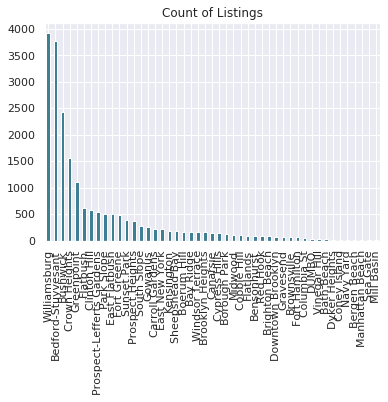

In [8]:
df['Count of Listings'].plot(kind = 'bar', cmap = cmap)
plt.title('Count of Listings')

### Normalized Count Listings by Population

While the raw listing numbers are interesting it is hard to draw actual conclusions about the density of Airbnb listings in each city becuase larger cities may have more listings.

So we will normalize the count of listing data by dividing it by the population of each metro area in thousands.

In [9]:
# %% Creating DataFrame of population in each metro area in millions from US Census 2015
pop = pd.read_csv('brooklyn_population.csv').convert_objects(convert_numeric=True)
pop.columns = ['City', 'Population']
pop = pop.set_index('City')

#Merging with listing data and normalizing
df1 = pd.concat([df, pop], axis= 1)
df1 = df1.astype('float')
df1['Normalized by Population'] = df1['Count of Listings'] / df1['Population']
df1.sort_values(['Normalized by Population'], ascending=[False]).reset_index(0)

,index,Count of Listings,Population,Normalized by Population
0,Williamsburg,3915.0,0.14444,27104.680144
1,Kensington,176.0,0.01187,14827.295703
2,Greenpoint,1103.0,0.34719,3176.934820
3,DUMBO,32.0,0.01139,2809.482002
4,Bedford-Stuyvesant,3767.0,1.57530,2391.290548
5,Prospect Heights,364.0,0.16180,2249.690977
6,Clinton Hill,572.0,0.26936,2123.552124
7,Bushwick,2436.0,1.29239,1884.879951
8,Carroll Gardens,220.0,0.12853,1711.662647
9,Fort Greene,484.0,0.28335,1708.134816


### Estimating 'Supply' and 'Demand' of Listings: Popularity and Normalized Count of Listings

The demand or popularity of listings in a city can be estimated by the average number of booked days in the upsoming calendar year.

The supply of listings in a city can be estimated by the normalized number of listings in a city.

Lets look at the relationship between these two variables:

In [10]:
z = [(365 - statistics['availability_365']['mean']).convert_objects(convert_numeric = True), df1['Normalized by Population']]
df2 = pd.concat(z, axis=1)
df2

,mean,Normalized by Population
Bath Beach,171.961538,86.866460
Bay Ridge,208.736196,205.364680
Bedford-Stuyvesant,249.166180,2391.290548
Bensonhurst,222.827160,53.393098
Bergen Beach,203.916667,26.530477
Boerum Hill,289.333333,1473.629783
Borough Park,205.753968,118.468930
Brighton Beach,203.272727,216.614623
Brooklyn Heights,299.183007,755.331754
Brownsville,234.645161,33.824516


Text(0.5, 1.0, 'Popularity and Normalized Listing Count')

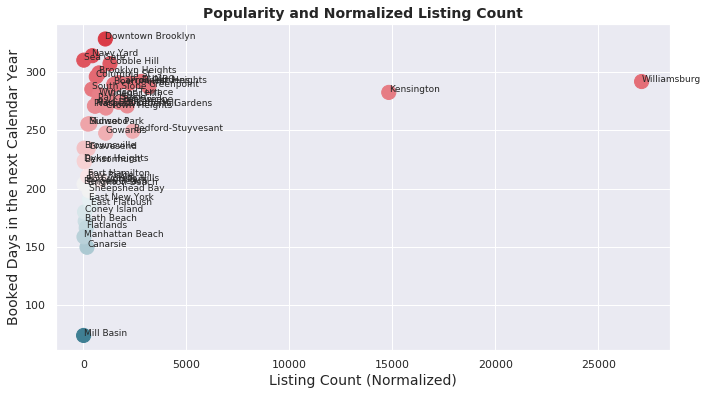

In [13]:
z = [(365 - statistics['availability_365']['mean']).convert_objects(convert_numeric=True), df1['Normalized by Population']]
df2 = pd.concat(z, axis = 1)

x = df2['Normalized by Population']
y = df2['mean']

n = (df2.index.tolist())

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 9)

plt.xlabel('Listing Count (Normalized)', fontsize=14)
plt.ylabel('Booked Days in the next Calendar Year', fontsize=14)
plt.title('Popularity and Normalized Listing Count', fontsize=14, fontweight='bold')

### Average Price per Area: Where is it the most and least expensive to stay, on average, at an Airbnb listing?

Sea Gate, Vinegar Hill and Brooklyn Heights have the most expensive listing prices on average, while Cypress Hills, Bensonhurst, and Borough Park are the cheaper places to stay, on average.



In [16]:
pd.DataFrame(statistics['price']['mean'].convert_objects(convert_numeric=True)).sort_values(['mean'], ascending=[False])


,mean
location,
Sea Gate,232.142857
Vinegar Hill,197.645161
Brooklyn Heights,193.786667
Cobble Hill,190.458333
DUMBO,181.250000
Mill Basin,179.750000
Carroll Gardens,174.031818
Boerum Hill,173.700000
Park Slope,169.077079


#### Price and Normalized Listing Count

Lets look at price in the context of another variable, Normalized Listing count. There is a somewhat strong coorlation, with a correlation coeff. of around .5. This strong positive relationship indicates that as the normalized number of listings increases, the price does as well.

Text(0.5, 1.0, 'Price and Normalized Listing Count')

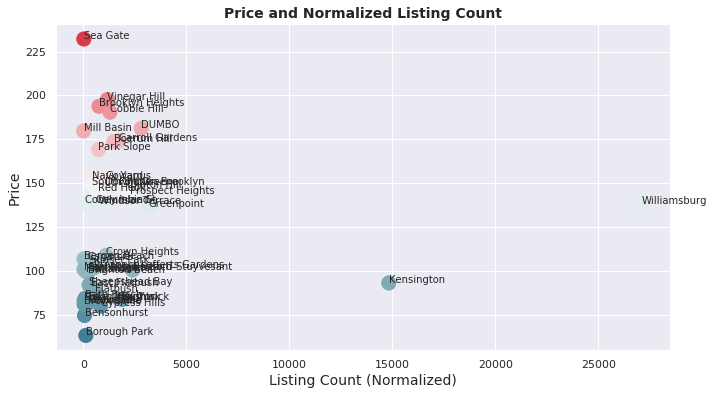

In [18]:
z = [statistics['price']['mean'].convert_objects(convert_numeric=True), df1['Normalized by Population']]
df2 = pd.concat(z, axis = 1)

x = df2['Normalized by Population']
y = df2['mean']

n = (df2.index.tolist())

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Listing Count (Normalized)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Normalized Listing Count', fontsize=14, fontweight='bold')

In [19]:
#Coorelation between the two variables
df2.corr()

,mean,Normalized by Population
mean,1.000000,0.052465
Normalized by Population,0.052465,1.000000


### Average Availability of Listings: What areas are more popular to visit?

The first metric we will analyze is the average number of days that a listing is booked in the next year. The higher the number of booked days, the more popular an area is. The most popular travel destinations for users are Downtown Brooklyn, Navy Yard, and Sea Gate, Cobble Hill and Brooklyn Heights These are large areas within the city so this relationship makes sense.

A second metric that can be used to determine the popularity of listings in a particular city is the average number of reviews per city. The more that a city is reviewed on average, the more the listing is booked on average. There are similarities in order of the cites in the two lists.

Cypress Hills jumps from the bottom of the list on availability and towards the top on the number  of reviews. So although Cypress Hills isn't a popular place for travelers relative to the other cities included in the data set, it is well reviewed. This may be an indication of the superior value of Seattle Airbnb listings.

In [22]:
x = (365 - statistics['availability_365']['mean']).convert_objects(convert_numeric=True)
x = pd.DataFrame(x).sort_values(['mean'], ascending=[False])
x.columns = ['Availability']
x

,Availability
location,
Downtown Brooklyn,328.253333
Navy Yard,313.916667
Sea Gate,310.111111
Cobble Hill,307.102041
Brooklyn Heights,299.183007
Columbia St,295.953488
DUMBO,291.843750
Williamsburg,291.766284
Carroll Gardens,290.772727


In [23]:
x = pd.DataFrame(statistics['number_of_reviews']['mean'].convert_objects(convert_numeric=True)).sort_values(['mean'], ascending=[False])
x.columns = ['Avg. # of Reviews']
x

,Avg. # of Reviews
location,
Manhattan Beach,41.700000
DUMBO,40.906250
Canarsie,38.109589
South Slope,37.469314
Brownsville,33.790323
Cypress Hills,33.043165
East New York,31.967290
Prospect Heights,31.576923
Gowanus,30.858871


### Price and Availability Listings: What the relationship between the popularity of a listing and its price?

There seems to a positive coorelation beetween the price and the popularity of listing, or the average number of days an area' listings are booked. However this trend only emerges once we elimate Mill Basin as an outiler. The first graph displayed below contains the Mill Basin data point, and the second removes it.

The more popular a listing (higher the number of days booked will be) the higher the price. This seems to suggest that cities which are more popular to travel cost more to stay at. Demand drives up the price.

Text(0.5, 1.0, 'Average Price and Popularity of Listings')

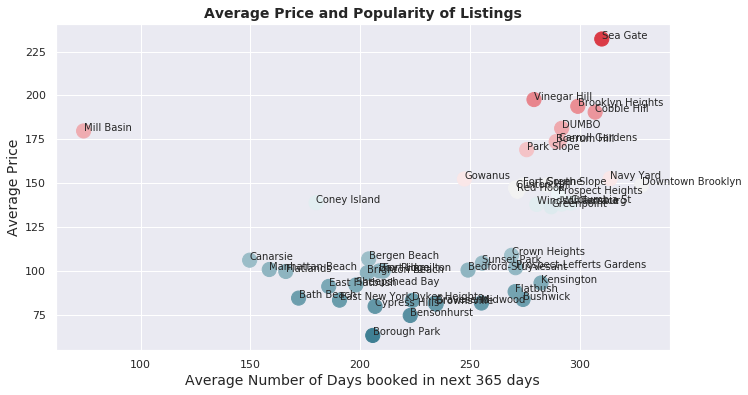

In [26]:
x = (365 - statistics['availability_365']['mean']).convert_objects(convert_numeric=True)
y = statistics['price']['mean'].convert_objects(convert_numeric=True)

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Average Number of Days booked in next 365 days', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price and Popularity of Listings', fontsize=14, fontweight='bold')

#### After Dropping Mill Basin

Text(0.5, 1.0, 'Average Price and Popularity of Listings')

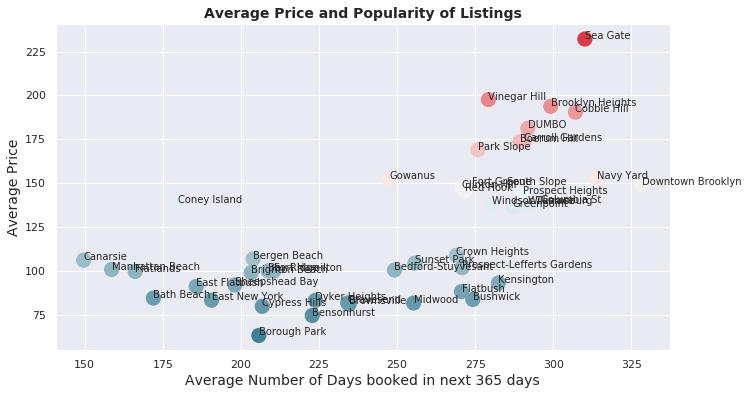

In [29]:
x = (365 - statistics['availability_365']['mean'].convert_objects(convert_numeric = True).drop('Mill Basin'))
y = statistics['price']['mean'].convert_objects(convert_numeric = True).drop('Mill Basin')
n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)

plt.xlabel('Average Number of Days booked in next 365 days', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price and Popularity of Listings', fontsize=14, fontweight='bold')

In [32]:
#Coorelation between the two variables
df = pd.concat ([x,y], axis =1 )
df.corr()

,mean,mean
mean,1.000000,0.651145
mean,0.651145,1.000000


### Price and Average Rating: How does the average quality of a listing correlate to the average price?

The data here is very dispersed and suggests that ratings and price do not have a clear relationship.

This reveals an interesting quality of Airbnb listings relative to the traditional hotel industry. Even if a user pays more or less for a listing this does not have much to do with the quality of thier stay. In the traditional hotel industry the quality of your stay is very driven by the price (hotel vs. motel). Usually the more one pays the better your stay, whereas Airbnb users can pay minimally and have a great experience (Crown Heights) or the other way around (East New York for example, has a low rating for its average price).

Text(0.5, 1.0, 'Price and Average Rating')

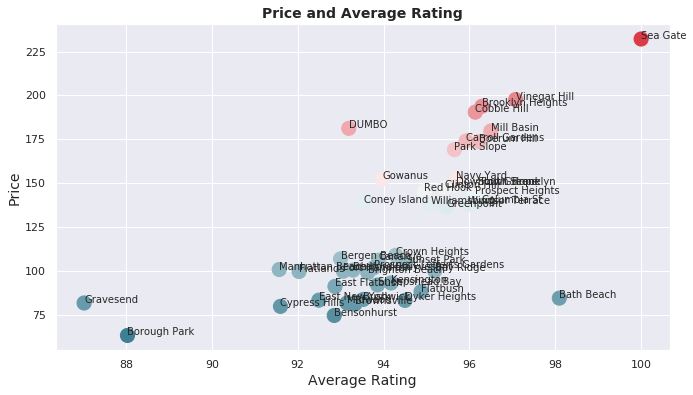

In [34]:

x = statistics['review_scores_rating']['mean'].convert_objects(convert_numeric=True)
y = statistics['price']['mean'].convert_objects(convert_numeric=True)

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Average Rating', fontsize=14, fontweight='bold')

### Correlation Matrix for Airbnb Listing Data: Which Airbnb metrics are related to each other and how?

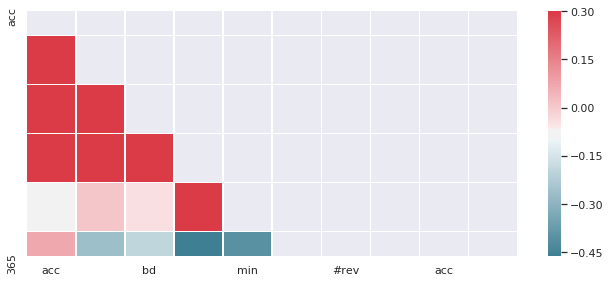

In [35]:
df1 = statistics.iloc[:,[2,7,12,17,22,27,32,37,42,47]].reset_index().drop('location',axis = 1).fillna(0)
df1.columns = df1.columns.droplevel(1)
df1.columns = ['acc', 'bt', 'bd', 'pr', 'min', '365', '#rev', 'rat', "acc", "val"]
#df_zillow = df_zillow['ZHVI_10Year']
#df1 = concat([df1, df_zillow], axis = 1).fillna(0)

coor= df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df1.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Part 2:The Zillow Real Estate

### What is the Zillow Home Value Index? 

From, Methodology for determining the ZHVI: http://www.zillow.com/research/zhvi-methodology-6032/
The ideal home price index would be based off sale prices for the same set of homes in each time period so there was never an issue of the sales mix being different across periods. This approach of using a constant basket of goods is widely used, common examples being a commodity price index and a consumer price index. Unfortunately, unlike commodities and consumer goods, for which we can observe prices in all time periods, we can’t observe prices on the same set of homes in all time periods because not all homes are sold in every time period.

The innovation that Zillow developed is a way of approximating this ideal home price index by leveraging the valuations Zillow creates on all homes (called Zestimates). Instead of actual sale prices on every home, the index is created from estimated sale prices on every home. Because of this fact, the distribution of actual sale prices for homes sold in a given time period looks very similar to the distribution of estimated sale prices for this same set of homes. But, importantly, Zillow has estimated sale prices not just for the homes that sold, but for all homes even if they didn’t sell in that time period.

Using this methodology, we now have a comprehensive and robust benchmark of home value trends can be computed which is immune to the changing mix of properties that sell in different periods of time.

### Zillow Home Value Index (Median Home Value):

In [50]:
ZHVI = pd.read_csv('Zip_Zhvi_Summary_AllHomes.csv').set_index('RegionName')

x = ['Bath Beach', 'Bay Ridge', 'Bedford-Stuyvesant', 'Bensonhurst',
       'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Brighton Beach',
       'Brooklyn Heights', 'Brownsville', 'Bushwick', 'Canarsie',
       'Carroll Gardens', 'Clinton Hill', 'Cobble Hill', 'Columbia St',
       'Coney Island', 'Crown Heights', 'Cypress Hills', 'Downtown Brooklyn',
       'DUMBO', 'Dyker Heights', 'East Flatbush', 'East New York', 'Flatbush',
       'Flatlands', 'Fort Greene', 'Fort Hamilton', 'Gowanus', 'Gravesend',
       'Greenpoint', 'Kensington', 'Manhattan Beach', 'Midwood', 'Mill Basin',
       'Navy Yard', 'Park Slope', 'Prospect Heights',
       'Prospect-Lefferts Gardens', 'Red Hook', 'Sea Gate', 'Sheepshead Bay',
       'South Slope', 'Sunset Park', 'Vinegar Hill', 'Williamsburg',
       'Windsor Terrace']

y = ['Zhvi', 'MoM', 'QoQ', 'YoY', '5Year', '10Year']

ZHVI = ZHVI.loc[x , y ]

#### Putting all the data into one Dataframe for coorelation analysis:

In [51]:
df_zillow = ZHVI
df_zillow.columns = ['ZHVI', 'ZHVI_MoM', 'ZHVI_QoQ', 'ZHVI_YoY', 'ZHVI_5Year', 'ZHVI_10Year']
df_zillow

,ZHVI,ZHVI_MoM,ZHVI_QoQ,ZHVI_YoY,ZHVI_5Year,ZHVI_10Year
RegionName,,,,,,
Bath Beach,687400,0.000291,-0.001598,0.009694,0.062312,0.046316
Bay Ridge,1024200,0.004610,0.029140,0.058277,0.056311,0.049015
Bedford-Stuyvesant,824100,-0.005671,-0.024387,-0.030813,0.075538,0.074076
Bensonhurst,704000,0.001422,-0.002126,0.012513,0.064849,0.046704
Bergen Beach,784700,0.007188,0.009001,0.035088,0.046830,0.029875
Boerum Hill,1202200,-0.004472,0.001583,-0.069000,0.042634,0.050277
Borough Park,842400,0.002857,0.024693,0.056169,0.084163,0.054715
Brighton Beach,696700,0.017675,0.045311,-0.006559,0.031750,0.030981
Brooklyn Heights,1789500,0.011474,0.009990,-0.074811,0.025865,0.036059


### Listing Trends and the Real Estate Metrics

#### How does the median home price of an area influence the price of an Airbnb listing?

The average price of a listing seems to increase as the median home value increases.

Sea Gate and Austin are two outliers, with low median home values and high average listing prices.

Text(0.5, 1.0, 'Home Price(ZHVI) and Airbnb Listing Price')

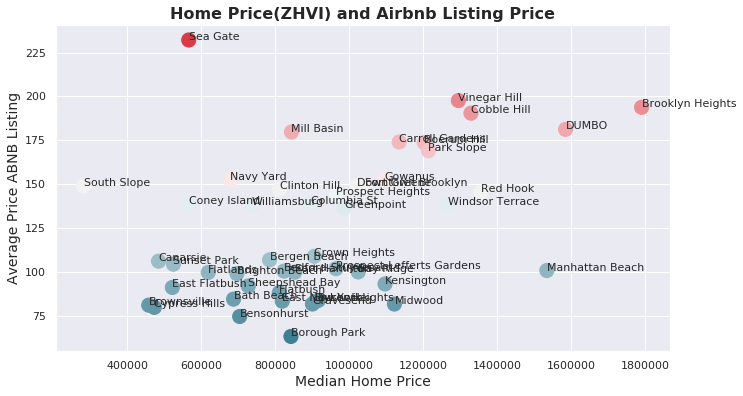

In [55]:
df = pd.concat([statistics['price']['mean'], df_zillow['ZHVI']], axis = 1).dropna()

x = df['ZHVI']
y = df['mean']


n = (df.index).tolist()

fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 11)
    
    
plt.xlabel('Median Home Price', fontsize=14)
plt.ylabel('Average Price ABNB Listing', fontsize=14)
plt.title('Home Price(ZHVI) and Airbnb Listing Price', fontsize=16, fontweight='bold')

In [56]:
df = df.drop(['Sea Gate', 'South Slope'])
df.corr()

,mean,ZHVI
mean,1.000000,0.583771
ZHVI,0.583771,1.000000


### How does the change in home price over five years coorelate to the price? Are listings in emerging cities, with high growth, priced at a higher value?

A little over half the data follow the relationship of the average listing price increasing as home value increases. However, East New York, Crown Heights, Williamsburg, and Clinton Hill have had high growth in home values over the last five years yet have maintained relatively low prices.

Text(0.5, 1.0, 'Home Price Growth, 5 Years and ABNB Listing Price')

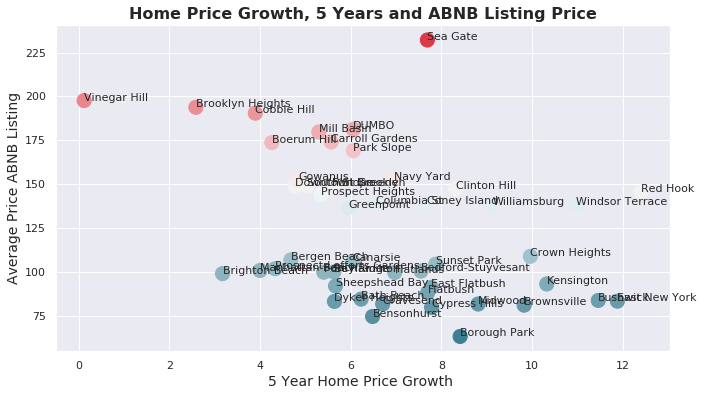

In [60]:
df = pd.concat([statistics['price']['mean'], df_zillow['ZHVI_5Year']], axis = 1).dropna()

x = df['ZHVI_5Year'] *100
y = df['mean']

n = (df.index).tolist()

fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 11)
    
plt.xlabel('5 Year Home Price Growth ', fontsize=14)    
plt.ylabel('Average Price ABNB Listing', fontsize=14)
plt.title('Home Price Growth, 5 Years and ABNB Listing Price', fontsize=16, fontweight='bold')

### Coorelation Matrix for ZHVI: How do ZHVI metrics relate to one another?

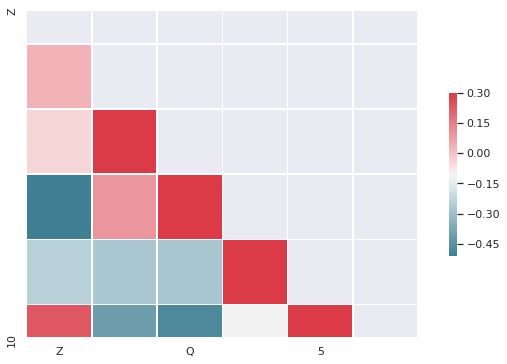

In [61]:
df2 = df_zillow
df2.columns = ['Z', 'M', 'Q', 'Y', '5', '10']
coor= df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Coorelation Matrix for ZHVI and Price: How do Listing Price and Home Value relate?

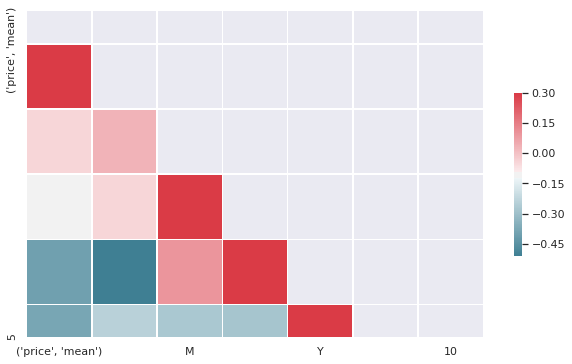

In [63]:
df1 = pd.DataFrame(statistics.iloc[:,17])
df = pd.concat([df1, df2], axis =1)
coor= df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Part 3: Regression Model for Predicting Average Price  -- Using ZHVI and Airbnb Listing Data

### Putting together Airbnb and Zillow features to predict Price

Let's look at the features we have from the Airbnb Data set and Zillow Data Set and plot them against price to determine which features, or independent variables, should be used to predict price. We are looking for a linear realtionship which may have to be achieved through transformation.

In [122]:
def read_data(location):
       location = location[['zipcode', 'accommodates', 'bathrooms', 'bedrooms', 'price',
              'minimum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating',
              'review_scores_accuracy', 'review_scores_value']].dropna(axis =0)
       location = location.set_index('zipcode')
       return location

### We are going to join the Zillow data and Airbnb data according to the zip code of the listing to achieve more granularilty when looking at the real estate data for each listing.

1) We re-read the Airbnb data and create a dataframe containing information on every listing in each city. Set the index to the zip code.

2) We then merge the real estate data and Airbnb listing data at the zipcode and asess our features.

In [138]:
nyc = pd.read_csv('listings.csv.gz')
bath_beach = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Bath Beach'])
bath_beach['price'] = bath_beach['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nyc = pd.read_csv('listings.csv.gz')
bath_beach = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Bath Beach'])
bath_beach['price'] = bath_beach['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

bay_ridge = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Bay Ridge'])
bay_ridge['price'] = bay_ridge['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

bed_stuy = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Bedford-Stuyvesant'])
bed_stuy['price'] = bed_stuy['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

bensonhurst = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Bensonhurst'])
bensonhurst['price'] = bensonhurst['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

bergen_beach = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Bergen Beach'])
bergen_beach['price'] = bergen_beach['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

boerum_hill = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Boerum Hill'])
boerum_hill['price'] = boerum_hill['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

borough_park = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Borough Park'])
borough_park['price'] = borough_park['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

brighton_beach = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Brighton Beach'])
brighton_beach['price'] = brighton_beach['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

brooklyn_heights = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Brooklyn Heights'])
brooklyn_heights['price'] = brooklyn_heights['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

brownsville = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Brownsville'])
brownsville['price'] = brownsville['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

bushwick = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Bushwick'])
bushwick['price'] = bushwick['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

canarsie = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Canarsie'])
canarsie['price'] = canarsie['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

carroll_gardens = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Carroll Gardens'])
carroll_gardens['price'] = carroll_gardens['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

clinton_hill = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Clinton Hill'])
clinton_hill['price'] = clinton_hill['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

cobble_hill = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Cobble Hill'])
cobble_hill['price'] = cobble_hill['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

columbia_st = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Columbia St'])
columbia_st['price'] = columbia_st['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

coney_island = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Coney Island'])
coney_island['price'] = coney_island['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

crown_heights = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Crown Heights'])
crown_heights['price'] = crown_heights['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

cypress_hills = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Cypress Hills'])
cypress_hills['price'] = cypress_hills['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

downtown_brooklyn = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Downtown Brooklyn'])
downtown_brooklyn['price'] = downtown_brooklyn['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

dumbo = read_data(nyc[nyc['neighbourhood_cleansed'] == 'DUMBO'])
dumbo['price'] = dumbo['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

dyker_heights = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Dyker Heights'])
dyker_heights['price'] = dyker_heights['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

east_flatbush = read_data(nyc[nyc['neighbourhood_cleansed'] == 'East Flatbush'])
east_flatbush['price'] = east_flatbush['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

east_newyork = read_data(nyc[nyc['neighbourhood_cleansed'] == 'East New York'])
east_newyork['price'] = east_newyork['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

flatbush = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Flatbush'])
flatbush['price'] = flatbush['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

flatlands = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Flatlands'])
flatlands['price'] = flatlands['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

fort_greene = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Fort Greene'])
fort_greene['price'] = fort_greene['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

fort_hamilton = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Fort Hamilton'])
fort_hamilton['price'] = fort_hamilton['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

gowanus = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Gowanus'])
gowanus['price'] = gowanus['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

gravesend = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Gravesend'])
gravesend['price'] = gravesend['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

greenpoint = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Greenpoint'])
greenpoint['price'] = greenpoint['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

kensington = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Kensington'])
kensington['price'] = kensington['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

manhattan_beach = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Manhattan Beach'])
manhattan_beach['price'] = manhattan_beach['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

midwood = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Midwood'])
midwood['price'] = midwood['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

mill_basin = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Mill Basin'])
mill_basin['price'] = mill_basin['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

navy_yard = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Navy Yard'])
navy_yard['price'] = navy_yard['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

park_slope = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Park Slope'])
park_slope['price'] = park_slope['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

prospect_heights = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Prospect Heights'])
prospect_heights['price'] = prospect_heights['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

pros_leff = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Prospect-Lefferts Gardens'])
pros_leff['price'] = pros_leff['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

red_hook = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Red Hook'])
red_hook['price'] = red_hook['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sea_gate = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Sea Gate'])
sea_gate['price'] = sea_gate['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sheepshead_bay = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Sheepshead Bay'])
sheepshead_bay['price'] = sheepshead_bay['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

south_slope = read_data(nyc[nyc['neighbourhood_cleansed'] == 'South Slope'])
south_slope['price'] = south_slope['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sunset_park = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Sunset Park'])
sunset_park['price'] = sunset_park['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

vinegar_hill = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Vinegar Hill'])
vinegar_hill['price'] = vinegar_hill['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

williamsburg = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Williamsburg'])
williamsburg['price'] = williamsburg['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

windsor_terrace = read_data(nyc[nyc['neighbourhood_cleansed'] == 'Windsor Terrace'])
windsor_terrace['price'] = windsor_terrace['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

In [139]:
#DataFrame with all listings and Airbnb features:
df_abnb = pd.concat([bath_beach, bay_ridge, bed_stuy, bensonhurst, bergen_beach, boerum_hill, borough_park, brighton_beach,
              brooklyn_heights, brownsville, bushwick, canarsie, carroll_gardens, clinton_hill, cobble_hill, columbia_st,
              coney_island, crown_heights, cypress_hills, downtown_brooklyn, dumbo, dyker_heights, east_flatbush, east_newyork,
              flatbush, flatlands, fort_greene, fort_hamilton, gowanus, gravesend, greenpoint, kensington, manhattan_beach,
              midwood, mill_basin, park_slope, prospect_heights, pros_leff, red_hook, sunset_park, vinegar_hill, williamsburg,
              windsor_terrace])

df_abnb

#DataFrame with Zillow Feature: Zillow Home Value Index
ZHVI = pd.read_csv('Zip_Zhvi_Summary_AllHomes_2.csv.gz').set_index('RegionName')
ZHVI = ZHVI.ix[:,[7,11,12]]

# Merge on Zipcode
df1 = pd.merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])


### Merge the two feature sets together on zipcode, we now have one dataframe with all the Airbnb and Zillow features/independent variables for predicting price:

In [140]:
df1

,accommodates,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,Zhvi,5Year,10Year,reviewtotal
10006.0,8,1.0,3.0,260.0,1,45,24,90.0,9.0,9.0,881800,0.008514,0.022600,108.0
10006.0,2,1.5,1.0,250.0,3,2,1,100.0,10.0,10.0,881800,0.008514,0.022600,120.0
10013.0,1,1.0,1.0,43.0,1,249,2,80.0,7.0,10.0,2915900,0.002913,0.033084,97.0
10128.0,4,1.0,1.0,65.0,1,0,6,97.0,10.0,10.0,1166700,0.039901,0.030659,117.0
11101.0,4,1.0,1.0,125.0,2,188,8,100.0,10.0,10.0,1094500,0.079594,0.063131,120.0
11203.0,1,1.0,3.0,35.0,3,319,7,97.0,10.0,9.0,522100,0.077784,0.032796,116.0
11203.0,4,1.0,2.0,125.0,3,48,18,88.0,9.0,9.0,522100,0.077784,0.032796,106.0
11203.0,2,1.0,1.0,79.0,4,174,15,88.0,8.0,9.0,522100,0.077784,0.032796,105.0
11203.0,1,1.0,1.0,45.0,3,30,35,99.0,10.0,10.0,522100,0.077784,0.032796,119.0
11203.0,2,1.0,1.0,149.0,2,145,24,94.0,10.0,9.0,522100,0.077784,0.032796,113.0


### Price and Features: Linearity of Features with Dependent Variable, Price

#### In order to create a linear model we have to establish that the features or independent variables, used in the model have a linear relationship with price, the dependent variable.

Let's plot the independent variables versus price to determine which features have the strongest linear relationship with price and which we may have to transform to achieve linearity with price.

#### Price and Availability, Price and # of Reviews

We transform Availability and # of Reviews using logs to achieve a linear trend with price.

Both have exponential relationships with price, which are corrected by taking the log.

Text(0.5, 1.0, 'Price and # of Reviews')

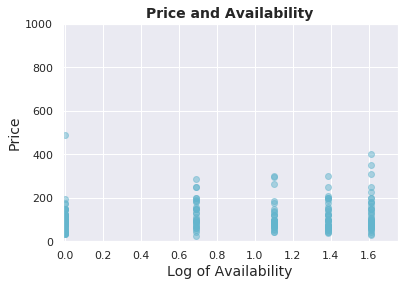

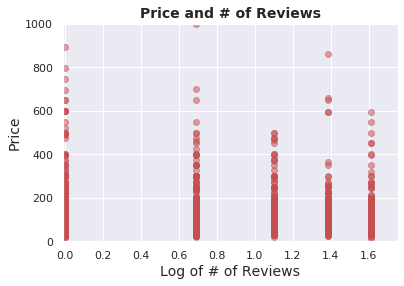

In [141]:
x = np.log(df1['availability_365'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x,y, c ='c', alpha = .5)
plt.ylim(0,1000)
plt.xlim(-0.01, 1.75)

plt.xlabel('Log of Availability', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Availability', fontsize=14, fontweight='bold')

x1 = np.log(df1['number_of_reviews'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c='r', alpha=.5)
plt.ylim(0,1000)
plt.xlim(-0.01, 1.75)

plt.xlabel('Log of # of Reviews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and # of Reviews', fontsize=14, fontweight='bold')

### Price and ZHVI (Median Home Value)

#### Price and ZHVI (Median Home Value) & Price and 5, 10 Year change in ZHVI

(0.045, 0.15)

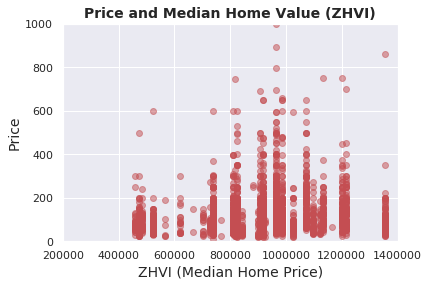

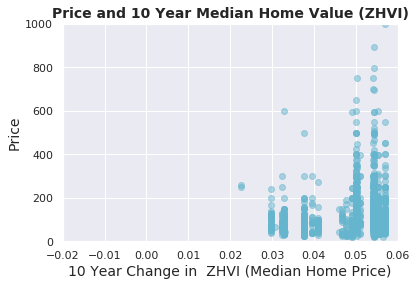

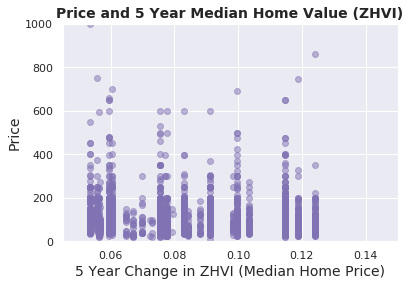

In [142]:
x2 = (df1['Zhvi'])
y2 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x2, y2, c= 'r', alpha = .5)
plt.ylim (0,1000)
plt.xlim (200000,1400000)

plt.xlabel('ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and Median Home Value (ZHVI)', fontsize=14, fontweight='bold')


x = (df1['10Year'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim (0,1000)
plt.xlim(-.02,.06)

plt.xlabel('10 Year Change in  ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and 10 Year Median Home Value (ZHVI)', fontsize=14, fontweight='bold')


x1 = (df1['5Year'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'm', alpha = .5)

plt.xlabel('5 Year Change in ZHVI (Median Home Price)', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Price and 5 Year Median Home Value (ZHVI)', fontsize=14, fontweight='bold')
plt.ylim (0,1000)
plt.xlim(.045,.15)

Text(0.5, 1.0, '# of Bedrooms and Price')

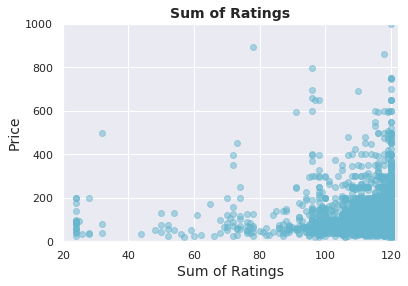

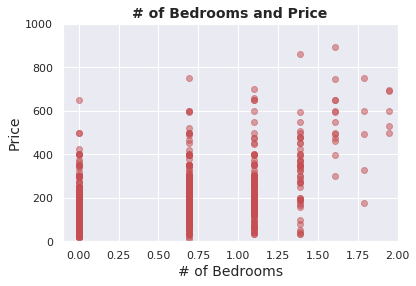

In [143]:
x = (df1['reviewtotal'])
y = df1['price']

fig, ax = plt.subplots()
ax.scatter(x, y, c= 'c', alpha = .5)
plt.ylim (0,1000)
plt.xlim(20 ,122)

plt.xlabel('Sum of Ratings', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('Sum of Ratings', fontsize=14, fontweight='bold')

x1 = np.log(df1['bedrooms'])
y1 = df1['price']

fig, ax = plt.subplots()
ax.scatter(x1, y1, c = 'r', alpha = .5)
plt.ylim (0,1000)
plt.xlim(-.1 ,2)

plt.xlabel('# of Bedrooms', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('# of Bedrooms and Price', fontsize=14, fontweight='bold')

Text(0.5, 1.0, '# of Bedrooms/Bathroom/Accommodates and Price')

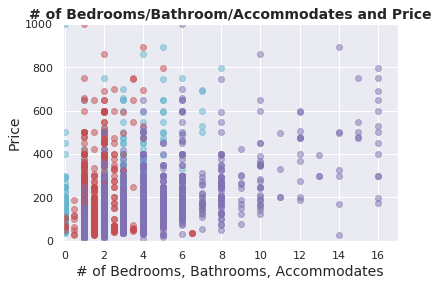

In [144]:
x1 = df1['bedrooms']
x2 = df1['bathrooms']
x3 = df1['accommodates']

y1 = df1['price']


fig, ax = plt.subplots()
ax.scatter(x1, y1, c= 'c', alpha = .5)
ax.scatter(x2, y1, c='r', alpha = .5)
ax.scatter(x3, y1, c='m', alpha = .5)
plt.ylim (-2,1000)
plt.xlim(-.1 ,17)

plt.xlabel('# of Bedrooms, Bathrooms, Accommodates', fontsize=14)   
plt.ylabel('Price', fontsize=14)
plt.title('# of Bedrooms/Bathroom/Accommodates and Price', fontsize=14, fontweight='bold')

### The Model

#### Linear Model using all cities and all features:

We are going to create a linear regression model to predict the price of an Airbnb Listing in the US based on the listing data and home value data in each area in Brooklyn. The Airbnb Features being used are:  

 - Log of number of reviews
 - Log of Availability in the next 365 days
 - Sum of Ratings (Overall + Value Rating + Accuracy Rating)
 - The number of Reviews
 - The number of Bathrooms.

The Zillow Home Value data used:

 - ZHVI (Median Home Price)
 - ZHVI 5 Year Change
 - ZHVI 10 Year Change
 


In [145]:
#The merged features dataframe:
df1 = pd.merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

#Transforming:
df1['number_of_reviews'] = np.log(df1['number_of_reviews'])
df1['availability_365'] = np.log(df1['availability_365'])

#Final Features dataframe
features = df1[[ 'Zhvi', 'number_of_reviews', 'availability_365', 'reviewtotal', '10Year', '5Year', 'accommodates', 'bathrooms']].replace([np.inf, -np.inf], np.nan).fillna(0)


### Checking for correlation between the dependnet variables

Another requirement in creating a linear model are that independent variables, or features do not have a strong relationship to one another as this confounds the linear model. To check for this, we use a correlation matrix. Relationships between the variables are measured between -1 and 1. The higher the absolute number, the stronger the relationship, with the sign signifying the direction of the relationship. As a result of this, bedrooms was removed as feature as it had very strong correlations to bathrooms, accommodates and ZHVI.

#### The final correlation matrix demonstrates no strong correlations between the independent variables:

In [146]:
features.corr()

,Zhvi,number_of_reviews,availability_365,reviewtotal,10Year,5Year,accommodates,bathrooms
Zhvi,1.000000,-0.053962,-0.145714,0.073427,0.332967,-0.194440,0.045572,-0.032063
number_of_reviews,-0.053962,1.000000,0.178984,0.080123,0.009159,0.061650,0.041156,-0.002799
availability_365,-0.145714,0.178984,1.000000,-0.136577,-0.045028,0.088587,0.161501,0.138835
reviewtotal,0.073427,0.080123,-0.136577,1.000000,0.010266,-0.050111,-0.021181,-0.106589
10Year,0.332967,0.009159,-0.045028,0.010266,1.000000,0.595450,0.053959,0.077917
5Year,-0.194440,0.061650,0.088587,-0.050111,0.595450,1.000000,0.011446,0.065919
accommodates,0.045572,0.041156,0.161501,-0.021181,0.053959,0.011446,1.000000,0.236164
bathrooms,-0.032063,-0.002799,0.138835,-0.106589,0.077917,0.065919,0.236164,1.000000


### Model Evaluation

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = features
Y = pd.DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

print('R-squared on Training Data:', r2_score(Y_train, clf.predict(X_train)))
print('R-squared on Testing Data:', r2_score(Y_test, clf.predict(X_test)))

from sklearn.metrics import mean_squared_error

print('Mean squared error on Test set:', mean_squared_error(Y_test, clf.predict(X_test)))
print('Mean squared error on Testing Data:', mean_squared_error(Y_train, clf.predict(X_train)))

coef_df = pd.concat([pd.DataFrame(features.columns), pd.DataFrame(clf.coef_).transpose()], axis=1)
coef_df.columns = ['Feature', 'Regression Coefficient']
coef_df

R-squared on Training Data: 0.5545028572041881
R-squared on Testing Data: 0.45112822721296286
Mean squared error on Test set: 4976.831321046302
Mean squared error on Testing Data: 3898.0304566741065


,Feature,Regression Coefficient
0,Zhvi,0.000036
1,number_of_reviews,-9.207207
2,availability_365,1.272336
3,reviewtotal,0.538935
4,10Year,334.069528
5,5Year,-800.206361
6,accommodates,29.787153
7,bathrooms,9.215655


The r-squared is the coefficient of determination, measures how close the training and test data are to the fitted regression line. In other words, how good the model will do at predicting the price of a listing based on our selected features.

This coefficient of determination tells us that ~55.4% percentage of the total variance in the price of a listing can be explained by the linear regression model. At 56%, a little over half of the variability can be attributed to our model. This is reasonable, but we may be able to achieve better results using other alogrithms for linear regression or by changing our number features or range data included. The test data perfromed somewhat similarly, which is another good sign for the data. The high MSE is a concern, but something that can be corrected by refitting the model.

Listed below the r-squares are the regression coefficients for each feature that define the linear relationships in this model. The coefficient for each feature describes how much the listing price changes for a one unit increase in said feature net of all others. The 10 Year change and 5 Year change in median home value seem to be the most powerful predictors. They have a large impact on the price of a listing net of all other features changing. For example, a one percent increase in home value over 5 years, increases the price of a listing by 88 dollars net of all other features.

This is a good starting point for developing the model. We will use the mean squared error along with the r-squared to compare the accuracy and linear fit to others as we try to improve the model. There is definetly room for improvement, especially with MSE and R-squared.

### Residual Plot:

(-800, 400)

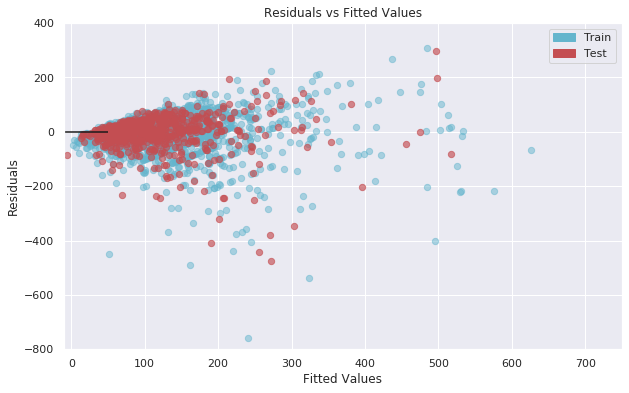

In [153]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,6))
plt.scatter(clf.predict(X_train), clf.predict(X_train) - Y_train, c='c', s=40, alpha=0.5)
plt.scatter(clf.predict(X_test), clf.predict(X_test) - Y_test, c='r', s=40, alpha = 0.65)
plt.hlines(y = 0, xmin=-30, xmax = 50)
#plt.title('Residual Plot using training (blue) and test (green) data')
plt.title('Residuals vs Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

blue_patch = mpatches.Patch(color='c', label='Train')
green_patch = mpatches.Patch(color ='r', label='Test')
plt.legend(handles=[blue_patch, green_patch])
plt.xlim(-10, 750)
plt.ylim(-800,400)

Text(0.5, 0, 'Price')

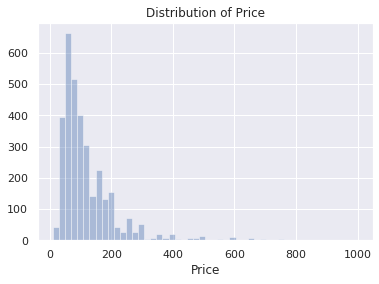

In [154]:
# Looking at the distribution of listings prices to defend disregarding heterosked. 
sns.distplot(Y, kde = False)
plt.title('Distribution of Price')
plt.xlabel('Price')

The residuals here describe the difference in the observed/actual listing price and predicted listing price using the model. The residuals should be distributed randomly above and below to axis tending to cluster towards the middle without any clear patterns. These qualities are indicative of a good linear model, with a normal distribution of data. Normality in the data is important as it is an assumption in creating a linear model.

The model seems to be heteroscedastic, meaning that the residuals get larger as the prediction moves from large to small. The model is better at predicting prices for average priced listings at around 300 dollars a night or lower. For those values, the residuals are evenly and randomly distributed above and below the axis with no pattern, indication of a good model.

### Fine-Tuning the Model: Predicting Price for Highly Popular Areas

We may be able to achieve better prediction and r-squared if we segment the cities by a strong variable such as Availability. Putting similar listings together will result in more correlation.

#### Recall from the exploratory analysis above that the most popular areas are those that have the smallest percent average availability in the next year:

In [156]:
x = ((statistics['availability_365']['mean'] / 365)*100).convert_objects(convert_numeric=True)
pd.DataFrame(x).sort_values(['mean'], ascending=[True])

,mean
location,
Downtown Brooklyn,10.067580
Navy Yard,13.995434
Sea Gate,15.038052
Cobble Hill,15.862455
Brooklyn Heights,18.032053
Columbia St,18.916853
DUMBO,20.042808
Williamsburg,20.064032
Carroll Gardens,20.336239


Segment the Highly Popular (Less that 50% availability in the coming year) from the rest of the samples of areas. We might be able to predict price better for more popular areas.

**Highly Popular Areas in Brooklyn**:  Downtown Brooklyn, Navy Yard, Cobble Hill, Sea Gate, Brooklyn Heights, Columbia St, Carroll Gardends, Williamsburg, Boerum Hill, Prospect Heights, Greenpoint, Vinegar Hill, Windsor Terrance, South Slope, Kensinton, Park Slope, Fort Greene, Flatbush, Clinton Hill, Prospect-Lefferts Gardens, Bushwick, Crown Heights, Red Hook, Midwood, Sunset Park, DUMO, and Bedford-Stuyvesant.

In [161]:
#DataFrame with Airbnb data on highly popular areas:
df_abnb = pd.concat([downtown_brooklyn, navy_yard, cobble_hill, sea_gate, brooklyn_heights, columbia_st, carroll_gardens, williamsburg, boerum_hill,
                  prospect_heights, greenpoint, vinegar_hill, windsor_terrace, south_slope, kensington, park_slope, fort_greene, flatbush, clinton_hill,
                  prospect_heights, bushwick, crown_heights, red_hook, midwood, sunset_park, dumbo, bed_stuy])

#DataFrame with Zillow Feature: Zillow Home Value Index
ZHVI = pd.read_csv('Zip_Zhvi_Summary_AllHomes_2.csv.gz').set_index('RegionName')
ZHVI = ZHVI.ix[:,[7,11,12]]

# Merge on Zipcode
df1 = pd.merge(df_abnb, ZHVI, left_index = True, right_index = True).dropna()
df1['reviewtotal'] = (df1['review_scores_rating'] + df1['review_scores_accuracy'] + df1['review_scores_value'])

#Transforming:
df1['number_of_reviews'] = np.log(df1['number_of_reviews'])
df1['availability_365'] = np.log(df1['availability_365'])

#Final Features dataframe
features = df1[[ 'Zhvi', 'number_of_reviews', 'availability_365', 'reviewtotal', '10Year', '5Year', 'accommodates', 'bathrooms']].replace([np.inf, -np.inf], np.nan).fillna(0)

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = features
Y = pd.DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

print( 'R-squared on Training Data:', r2_score(Y_train, clf.predict(X_train)))
print( 'R=squared on Testing Data:', r2_score(Y_test, clf.predict(X_test)))

from sklearn.metrics import mean_squared_error
print( 'Mean squared error on the test set: ', mean_squared_error(Y_test, clf.predict(X_test)))
print( 'Mean squared error on the training set: ', mean_squared_error(Y_train, clf.predict(X_train)))

coef_df = pd.concat([pd.DataFrame(features.columns), pd.DataFrame(clf.coef_).transpose()], axis = 1)
coef_df.columns = ['Feature', 'Coefficient']
coef_df

R-squared on Training Data: 0.536630994362147
R=squared on Testing Data: 0.6053210940318122
Mean squared error on the test set:  3796.0171772504013
Mean squared error on the training set:  4345.840210094497


,Feature,Coefficient
0,Zhvi,0.000044
1,number_of_reviews,-9.095186
2,availability_365,1.766592
3,reviewtotal,0.595010
4,10Year,-260.203182
5,5Year,-639.524907
6,accommodates,29.621898
7,bathrooms,14.555488


The R-squared is a percentage that tells us how much of variance in y can be explained by the model, the higher the percent the more the model fits the data. This model's coefficient of determination tells us that ~ 60.53% percentage of the total variance in the price of a listing from a popular city can be explained by the linear regression model.

At 60%, almost two thirds of the variability can be attributed to our model. This is much higher than our original linear model using all areas. This better result proves that by grouping the most popular cities, we have created a stronger linear model. The most popular cities listing prices react similarly to changes in the features and create a better linear fit. The MSE is also reduced, another indication that by taking a subset we hae created a better model.

This is a good starting point for developing a better model by manipulating the data set, however we may be able to increase the level of fit by using another alogrithim to create a linear model.

(-800, 400)

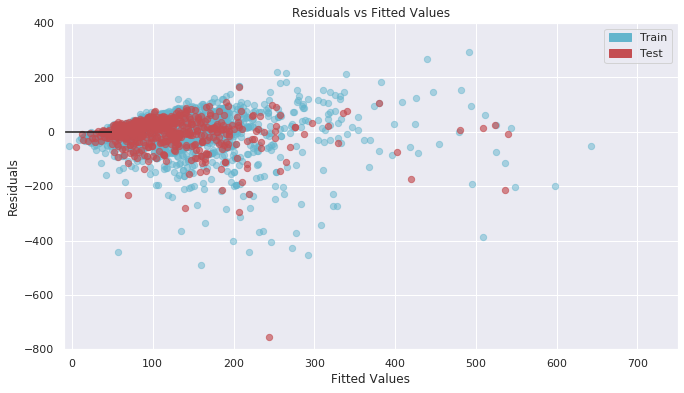

In [173]:
import matplotlib.patches as mpatches

plt.figure(figsize=(11,6))
plt.scatter(clf.predict(X_train), clf.predict(X_train) - Y_train, c='c', s=40, alpha=0.5)
plt.scatter(clf.predict(X_test), clf.predict(X_test) - Y_test, c='r', s=40, alpha = 0.65)
plt.hlines(y = 0, xmin=-30, xmax = 50)
#plt.title('Residual Plot using training (blue) and test (green) data')
plt.title('Residuals vs Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

blue_patch = mpatches.Patch(color='c', label='Train')
green_patch = mpatches.Patch(color ='r', label='Test')
plt.legend(handles=[blue_patch, green_patch])
plt.xlim(-10,750)
plt.ylim(-800, 400)

### Using the Random Forest Regression Model

Test using the Random Forest Regression model on our popular cities data to see if it results in a better fitting model.

The Random Forest model uses an algorithm which 'bootstraps'(taking of many random samples from the training data) to create a nodes that build a decision or regression tree which models the behavior of the data to create a linear model.

Lets see how it works with our popular cities data:

In [184]:
from sklearn.ensemble import RandomForestRegressor

X = features
Y = pd.DataFrame(df1['price']).fillna(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

rf = RandomForestRegressor(random_state = 1)
rf.fit(X_train, Y_train)

print("R-squared for training data: ", rf.score(X_train,Y_train) )
print("R-squared for test data: ", rf.score(X_test,Y_test) )

from sklearn.metrics import mean_squared_error
print('Mean squared error on the test set: ', mean_squared_error(Y_test, rf.predict(X_test)))
print('Mean squared error on the training set: ', mean_squared_error(Y_train, rf.predict(X_train)))

R-squared for training data:  0.9134701434931003
R-squared for test data:  0.6073445142207172
Mean squared error on the test set:  3443.5804929039155
Mean squared error on the training set:  829.7313366494525


The Fit is not that much different from the initial. However, MSE has decreased

(0, 1000)

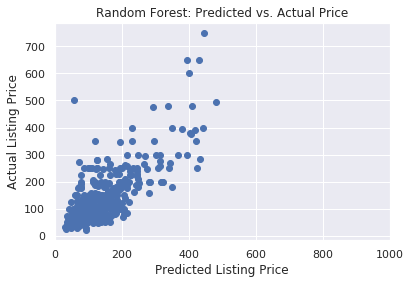

In [186]:
plt.scatter(rf.predict(X_test), Y_test.as_matrix())
plt.title('Random Forest: Predicted vs. Actual Price')
plt.xlabel('Predicted Listing Price')
plt.ylabel('Actual Listing Price')
plt.xlim(0,1000)

Text(0.5, 1.0, 'Distribution of Price')

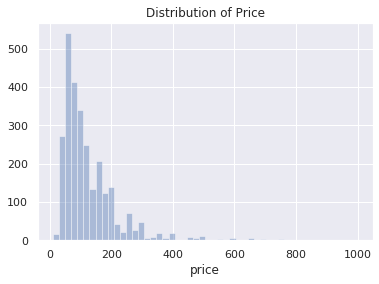

In [187]:
x = df1.price
sns.distplot(x, kde=False)
plt.title('Distribution of Price')

We plot the predicted price of the test data versus actual price to evaluate the model. The main effect apparent in this graph is a funnelling effect. As price increases, the model does not do as well of a job at predicting. This funnelling effect seems to compromise data where the price per night is above around 400. Before this price, the model does a good job predicting the price of listings.

When we look at the distribution of price for the dataset used in creating the model we see that a majority of the listings are priced below this benchmark. This means that a majority of listings are priced in a range that is able to be be accurately predicted by the model.

Therefore we establish that this model is best used for 'average' priced listings and disregard the funneling effect.